In [43]:
!pip install tensorflow

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check the shape of the data
print(f"Training data: {train_images.shape} images, labels: {train_labels.shape}")
print(f"Test data: {test_images.shape} images, labels: {test_labels.shape}")



Training data: (60000, 28, 28) images, labels: (60000,)
Test data: (10000, 28, 28) images, labels: (10000,)


In [45]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add a channel dimension (for compatibility with neural nets)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding (e.g., 5 becomes [0,0,0,0,0,1,0,0,0,0])
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [46]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Helps prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the model
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, # Epochs at 25 and batch size at 128 are ideal ranges for a model like this
                    validation_data=(test_images, test_labels))


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8050 - loss: 0.6250 - val_accuracy: 0.9815 - val_loss: 0.0601
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9687 - loss: 0.1078 - val_accuracy: 0.9845 - val_loss: 0.0478
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9788 - loss: 0.0711 - val_accuracy: 0.9886 - val_loss: 0.0325
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9828 - loss: 0.0565 - val_accuracy: 0.9890 - val_loss: 0.0321
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9895 - val_loss: 0.0300
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9884 - loss: 0.0401 - val_accuracy: 0.9906 - val_loss: 0.0264
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9907 - val_loss: 0.0253
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 

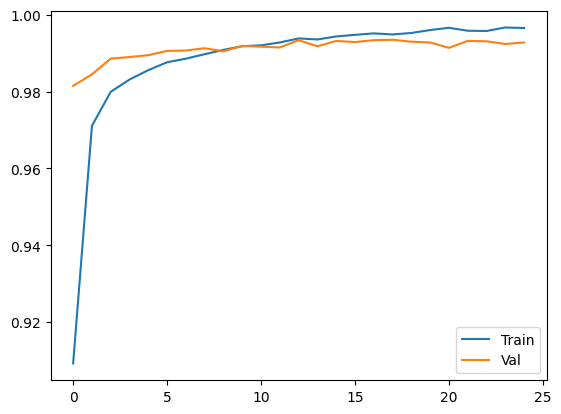

In [48]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
# Plots Model accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0380
Test accuracy: 0.99


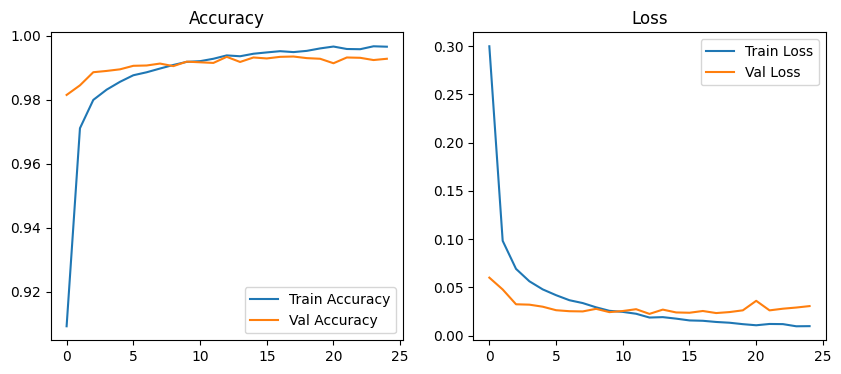

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Predicted: 7, Actual: 7


In [49]:
# Evaluate on test data

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.2f}")

# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Make a prediction on a sample
sample_image = test_images[0]  # Shape: (28,28,1)
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction)
print(f"Predicted: {predicted_label}, Actual: {np.argmax(test_labels[0])}")


In [50]:
model.save('handwriting_model.h5')

3.png


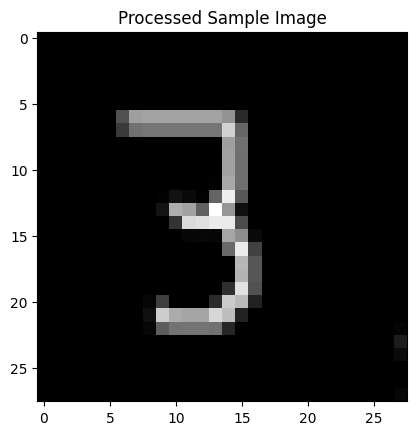

In [51]:
from PIL import Image
import numpy as np
import tensorflow as tf
import random
randimg = str(random.randint (0, 9)) # Pick a random number

model = tf.keras.models.load_model('handwriting_model.h5') # Load the saved model

# Path to your custom image
image_path = randimg + '.png'  # Pick a random picture of a number in the sample (images must be named single digit numbers only to be randomly picked as a sample)
# images must be in the same path
# Load and preprocess
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28

# Convert to array and normalize
img_array = np.array(img) / 255.0

# If your image is black digit on white background, invert it (MNIST is white on black)
# Uncomment if needed: img_array = 1 - img_array

# Reshape for the model (batch size 1, 28x28, 1 channel)
img_array = img_array.reshape(1, 28, 28, 1)
print (image_path)
# Visualize the processed image
import matplotlib.pyplot as plt
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title("Processed Sample Image")
plt.show()


 Image: 3.png
Predicted Digit: 3
Confidence: 100.00%



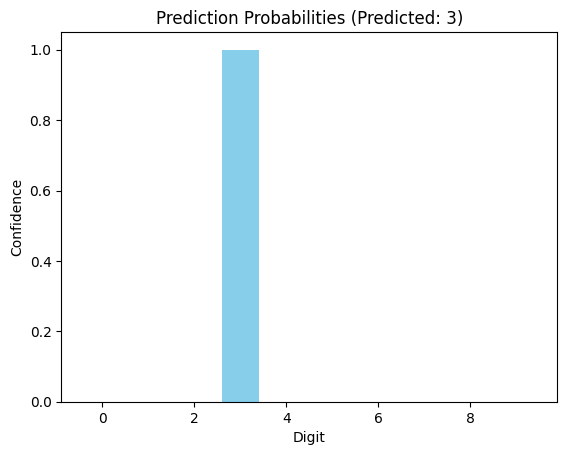

In [52]:
# Predict
prediction = model.predict(img_array, verbose=0)[0]  # shape: (10,)
predicted_digit = np.argmax(prediction)
confidence = np.max(prediction) * 100  # in percent

print(f"\n Image: {image_path}")
print(f"Predicted Digit: {predicted_digit}")
print(f"Confidence: {confidence:.2f}%\n")





# make a bar chart of probabilities

import matplotlib.pyplot as plt
plt.bar(range(10), prediction, color='skyblue')
plt.title(f"Prediction Probabilities (Predicted: {predicted_digit})")
plt.xlabel("Digit")
plt.ylabel("Confidence")
plt.show()
